In [5]:
!pip install torch torchvision
!pip install detecto

In [32]:
from google.colab import drive
from PIL import Image
from detecto import core, utils, visualize
from sklearn.svm import SVC

from IPython.display import Image as IPmage
from IPython.display import display
from google.colab.patches import cv2_imshow

from skimage import exposure
from skimage import feature
from joblib import dump, load
import cv2
import tqdm
import uuid
import numpy as np
import os

In [7]:
drive.mount('/content/drive')
WORKING_DIRECTORY = '/content/drive/My Drive/nti-logo-recognition/'
os.chdir(WORKING_DIRECTORY)

Mounted at /content/drive


In [8]:
model = core.Model.load('./data/model_weights_augm.pth', ['kruzhok'])

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


In [9]:
clf = load('./classifier.joblib') 

In [10]:
# Извлечение HOG из картинки
# Библиотеки для функции HOG


# Параметры HOG
_orientations = 15 # количество направлений градиентов
_pixels_per_cell = (16, 16) # количество пикселей на клетку
_cells_per_block = (4, 4) # Количество клеток на блок
_transform_sqrt = True # Уборка шумов с помощью корня
_block_norm = "L1" # Метод нормализации блока
_visualize = True # Визуализация
settings = [_orientations, _pixels_per_cell, _cells_per_block, _transform_sqrt, _block_norm, _visualize]

# Параметры обработки входных изображений
IMG_HEIGHT = 200 # Высота
IMG_WIDTH = 200 # Ширина

# Функция извлечение карты HOG и её изображения
def GetHOG (img, settings): # Входное изображеине
    HOG, img_HOG = feature.hog(img, 
                               orientations = settings[0], 
                               pixels_per_cell = settings[1], 
                               cells_per_block = settings[2], 
                               transform_sqrt = settings[3], 
                               block_norm = settings[4],
                               visualize = settings[5])
    return (HOG, img_HOG)

In [39]:
def classificate(logo_img):
    if logo_img.shape[0] == 0 or logo_img.shape[1] == 0:
        return False

    img = cv2.resize(logo_img, (IMG_WIDTH, IMG_HEIGHT))
    cv2_imshow(img)    

    # Возьмем HOG в качестве признака
    HOG, HOG_img = GetHOG(img.copy(), settings)
    prediction = int(clf.predict([HOG]))

    print("Prediction: ", prediction)

    if prediction == 2:
        return True
    return False

In [49]:
def predict(image_path):
    image = utils.read_image(image_path)

    labels, boxes, scores = model.predict(image)
    if len(boxes) == 0:
        return False

    labels_numpy = boxes.detach().cpu().numpy()

    print("BOXES: ", boxes)
    visualize.show_labeled_image(image, boxes, labels)


    for box in boxes:
        detected_logo = image[int(box[1]):int(box[3]), int(box[0]):int(box[2]), :]
        if classificate(detected_logo):
            pass
            # return True

    return False

In [24]:
def test_by_url(url):
    image = IPmage(url)
    open("test.jpg", "wb").write(image.data)
    display(image)
    print(predict(f"./test.jpg"))

In [18]:
def test_from_storage(path):
    image = IPmage(path)
    display(image)
    print(path, predict(path))

In [67]:
test_from_storage("./KEKLOLARBIDOL.png")

Output hidden; open in https://colab.research.google.com to view.

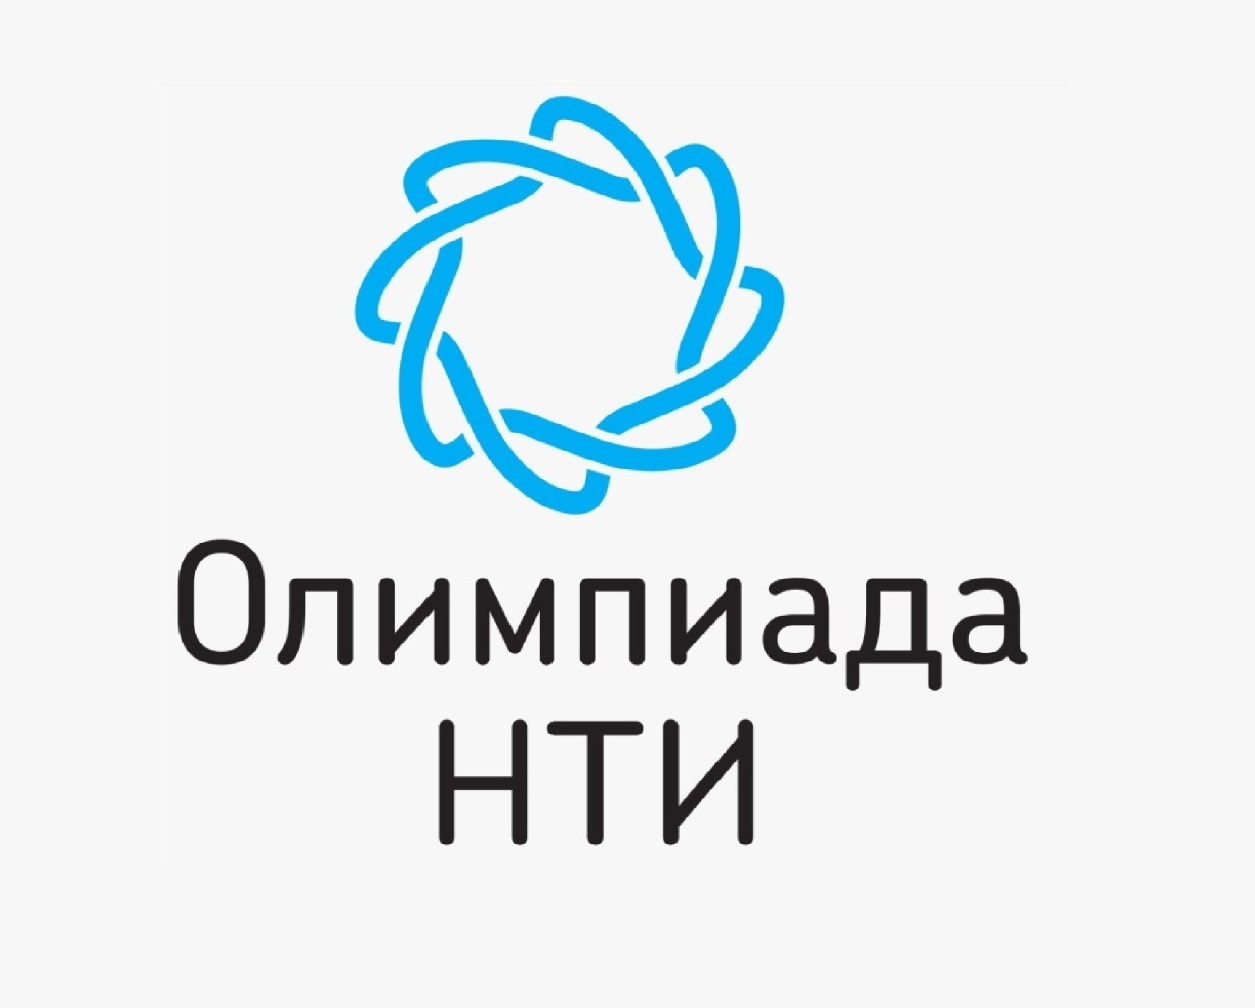

BOXES:  tensor([[168.8414, 532.7495, 268.1581, 673.7405]])


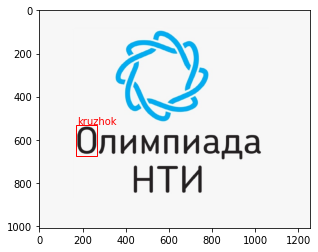

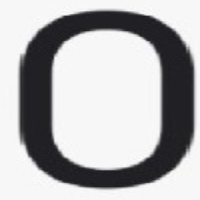

Prediction:  1
False


In [68]:
test_by_url("https://mosrobotics.ru/wp-content/uploads/2018/10/NTI-1.jpg")

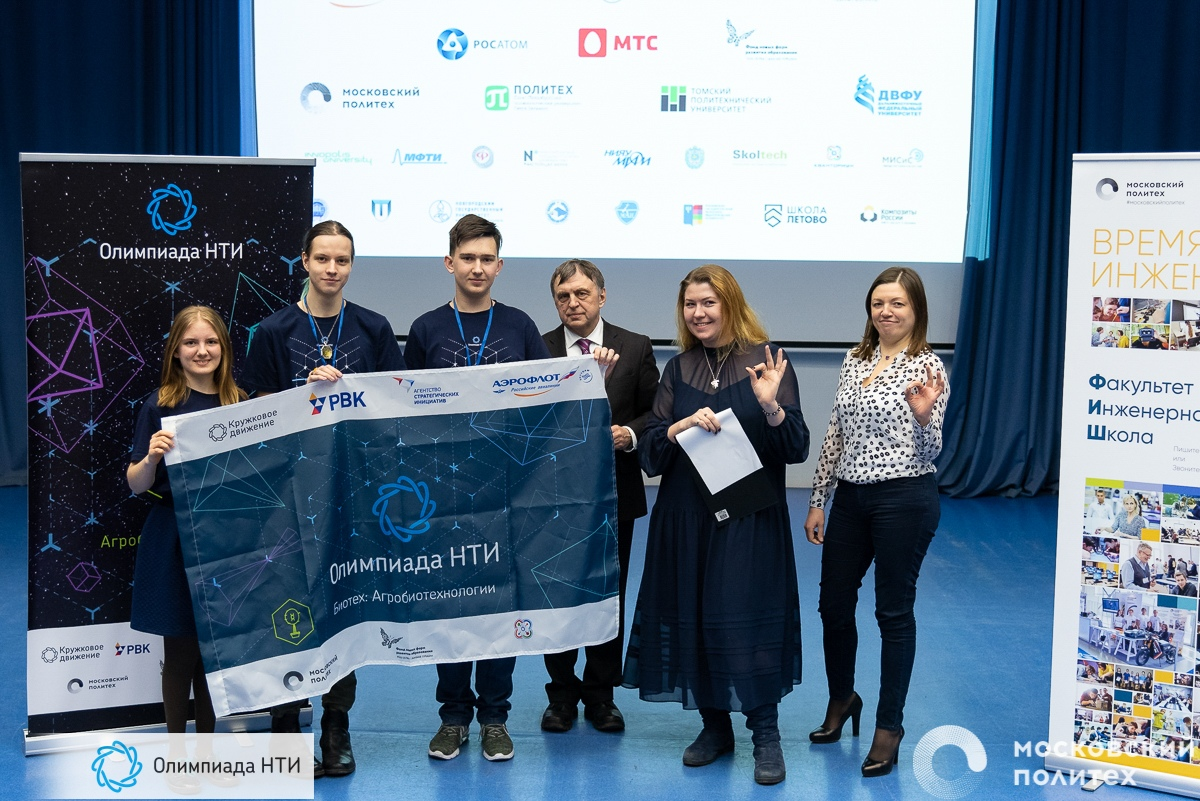

BOXES:  tensor([[ 142.2385,  179.9032,  203.0487,  237.6097],
        [  86.7884,  736.3386,  147.3581,  795.0408],
        [ 431.6664,   23.3944,  475.3098,   64.1376],
        [ 367.1276,  472.1590,  440.4503,  545.2877],
        [  38.2803,  643.9608,   59.0442,  663.7260],
        [ 543.3839,  198.1446,  572.8818,  225.9395],
        [ 470.5025,  334.3639,  484.0379,  344.7853],
        [ 205.5536,  422.1787,  228.9988,  441.9679],
        [ 760.2856,  202.7040,  787.4141,  232.1066],
        [ 611.4095,  196.5792,  642.6613,  228.1931],
        [ 468.5911,  142.1905,  495.8900,  172.8495],
        [ 682.0275,  143.5386,  706.4409,  173.5430],
        [1091.9758,  174.2021, 1122.6477,  199.8233],
        [1086.0979,  371.2302, 1109.1237,  389.9067],
        [ 150.1965,  753.8659,  169.4770,  774.8875],
        [ 511.0805,  617.7953,  534.9788,  640.7382]])


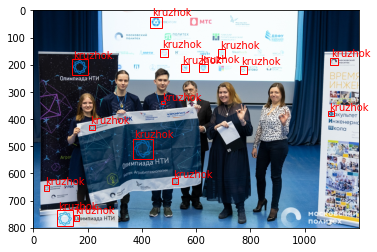

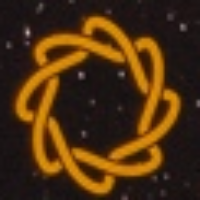

Prediction:  2


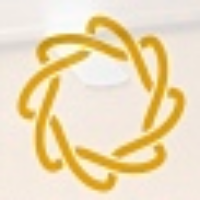

Prediction:  2


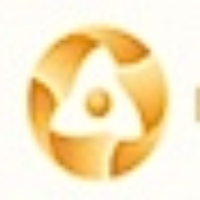

Prediction:  1


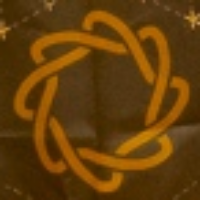

Prediction:  2


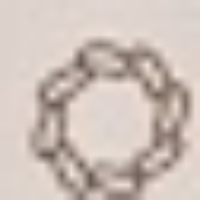

Prediction:  2


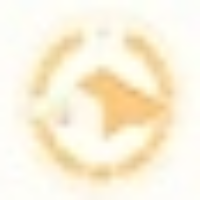

Prediction:  1


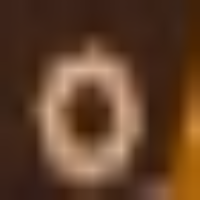

Prediction:  2


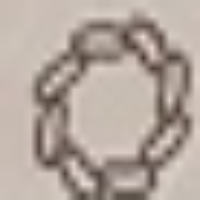

Prediction:  2


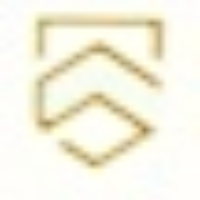

Prediction:  1


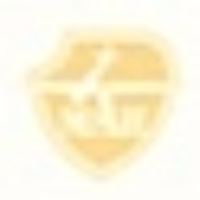

Prediction:  1


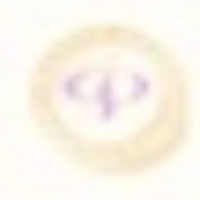

Prediction:  1


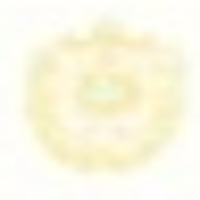

Prediction:  1


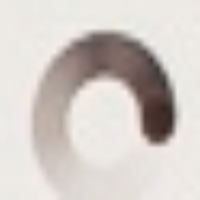

Prediction:  1


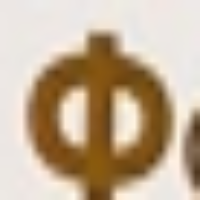

Prediction:  1


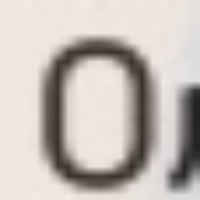

Prediction:  2


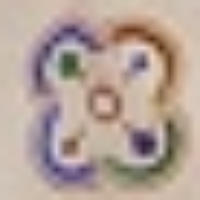

Prediction:  2
False


In [63]:
test_by_url("https://sun9-27.userapi.com/c852124/v852124793/f25d5/EL0ACsUIYjY.jpg")

In [ ]:
# for e in os.listdir('./data/test'):
#     image_path = f"./data/test/{e}"
#     image = IPmage(image_path)
#     display(image)
#     print(image_path, predict(image_path))